<a href="https://colab.research.google.com/github/ProfessorAbraham/10academy-week1-sentiment-stock-analysis/blob/main/notebooks/task_1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ProfessorAbraham/10academy-week1-sentiment-stock-analysis.git


Cloning into '10academy-week1-sentiment-stock-analysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 19 (delta 2), reused 15 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 5.04 KiB | 5.04 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [7]:
!cd 10academy-week1-sentiment-stock-analysis

In [5]:
import sys

In [9]:
sys.path.append('/content/10academy-week1-sentiment-stock-analysis/src')

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/yfinance_data'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df_temp = pd.read_csv(file)
    symbol = os.path.splitext(os.path.basename(file))[0]
    df_temp['stock'] = symbol
    dfs.append(df_temp)

stock_prices_df = pd.concat(dfs, ignore_index=True)
print(stock_prices_df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits                 stock  
0        0.0           0.0  TSLA_historical_data  
1        0.0           0.0  TSLA_historical_data  
2        0.0           0.0  TSLA_historical_data  
3        0.0           0.0  TSLA_historical_data  
4        0.0           0.0  TSLA_historical_data  


In [12]:
analyst_csv_path = '/content/drive/MyDrive/raw_analyst_ratings.csv'
import pandas as pd

analyst_df = pd.read_csv(analyst_csv_path)
print(analyst_df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Number of missing/unparsed dates: 1351341


<Axes: >

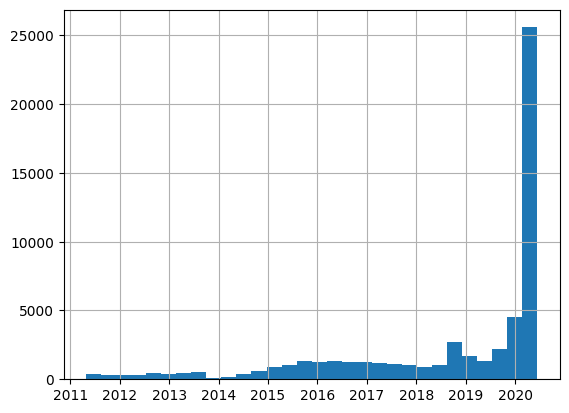

In [14]:
import pandas as pd

# Convert 'date' column to datetime, coercing errors to NaT
analyst_df['date'] = pd.to_datetime(analyst_df['date'], errors='coerce')

# Check if any dates failed to parse
missing_dates = analyst_df[analyst_df['date'].isna()]
print(f"Number of missing/unparsed dates: {len(missing_dates)}")

# Plot histogram of dates (drop missing dates)
analyst_df = analyst_df.dropna(subset=['date'])
analyst_df['date'].hist(bins=30)


publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


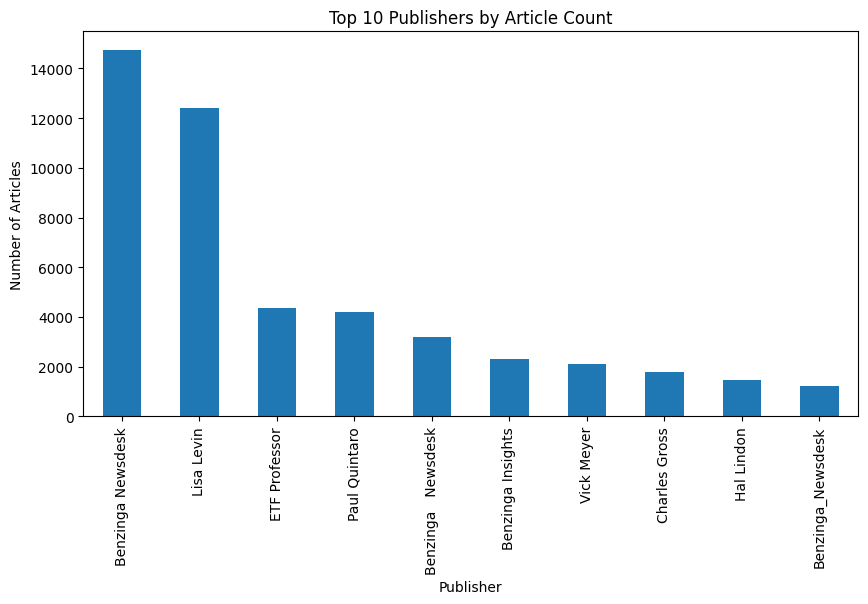

In [15]:
import matplotlib.pyplot as plt

# Count articles per publisher
publisher_counts = analyst_df['publisher'].value_counts()

# Display top 10 publishers
print(publisher_counts.head(10))

# Plot top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


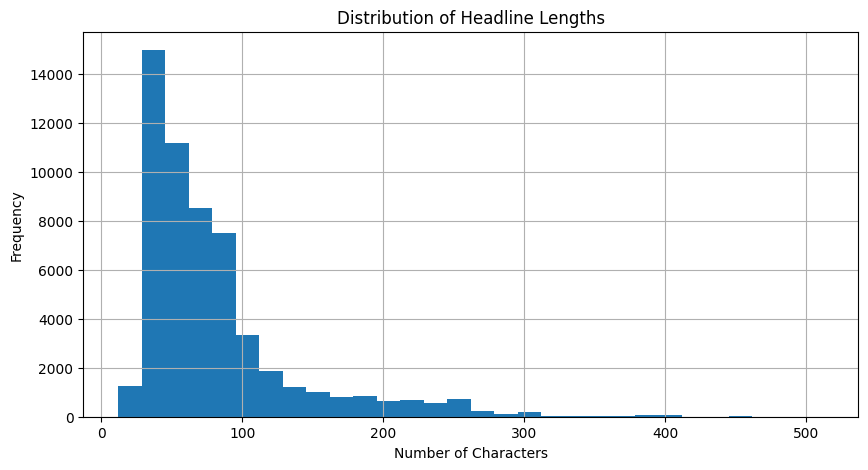

In [16]:
# Add headline length column
analyst_df['headline_length'] = analyst_df['headline'].str.len()

# Summary statistics
print(analyst_df['headline_length'].describe())

# Plot histogram
analyst_df['headline_length'].hist(bins=30, figsize=(10,5))
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


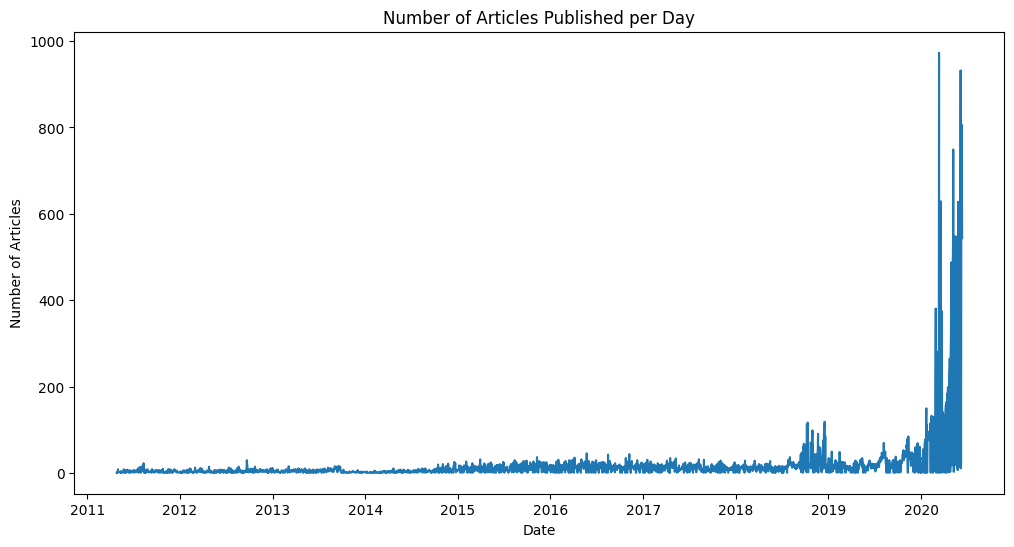

In [17]:
# Group by date only (remove time)
analyst_df['date_only'] = analyst_df['date'].dt.date

# Count articles per day
daily_counts = analyst_df.groupby('date_only').size()

# Plot time series of article counts
daily_counts.plot(figsize=(12,6), title='Number of Articles Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()
